### Laboratory work 5: Fuzzy Numbers
The task of the lab is to develop the fuzzy operations:
* Division in the method __truediv__
* Summation in the method __add__

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

In [192]:
def mu_max(val,width,x):
    buff = ((x-val)/width)*((x-val)/width)
    return max(0,1-buff)  


class FuzzyValue():
    
    def __init__(self,val,width,mu = None):
        self.val = float(val)
        self.width = float(width)
        if mu is not None:
            self.mu = partial(mu,self.val,self.width)
        self.op = None
    

    def __call__(self,x):
        if self.mu is not None:
            return float(self.mu(x))


    def __truediv__(self, o):
        new_val = min(self.val/o.val, self.val/o.width, self.width/o.val, self.width/o.width)
        new_width = max(self.val/o.val, self.val/o.width, self.width/o.val, self.width/o.width)
        return FuzzyValue(new_val, new_width, mu_max)

    def __add__(self, o):
        self.op = o
        return FuzzyValue(self.val+o.val, self.width+o.width, mu_max)
    
    def draw(self):
        xs = np.linspace(-7,15,num=100)  #XS is X 
        y = [self(x) for x in xs] #Y is mu(x)
        plt.figure()
        plt.plot(xs,y)        

a = FuzzyValue(5.1,1.5,mu_max)
b = FuzzyValue(4.3,2,mu_max)
# (a+b).draw()
# print(a+b)
# print(a/b)
# c=a+b
# d=a/b


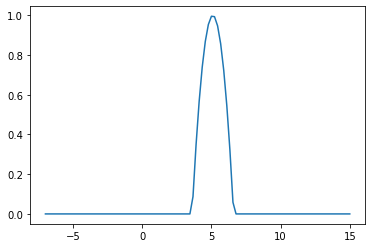

In [193]:
a.draw()

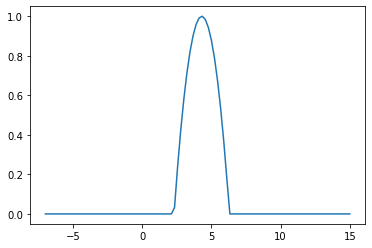

In [194]:
b.draw()

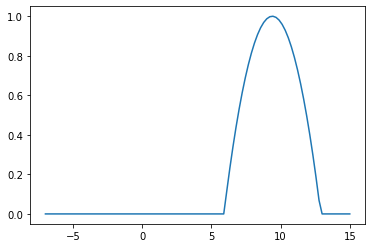

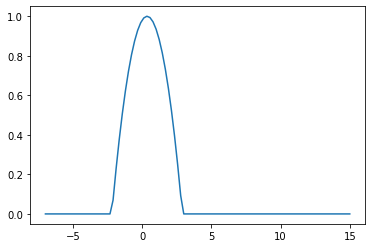

In [195]:
c = a+b
c.draw()
d=a/b
d.draw()